In [ ]:
import numpy as np
import pandas as pd



In [148]:
sum([10, 12, 10, 8]) / 4

10.0

In [164]:
pd.Series([5, 5, 8]).apply([np.mean, np.median])

mean      6.0
median    5.0
dtype: float64

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error([5, 5, 8], [6, 6, 6]), mean_absolute_error([5, 5, 8], [5, 5, 5])

(2.0, 1.0)

In [149]:
import numpy as np
import pandas as pd

n = 200

height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

df_height = pd.DataFrame(
    {
        'Gender': [1 for i in range(height_f.size)] + [2 for i in range(height_m.size)],
        'Height': np.concatenate((female_h, male_h))
    }
)

# df_height['Gender (text)'] = df_height['Gender'].apply(lambda g: {1: 'F', 2: 'M'}.get(g, 'N/A'))

In [150]:
df_height.sample(3)

,Gender,Height
127,1,158.940487
493,2,173.892213
768,2,176.425039


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


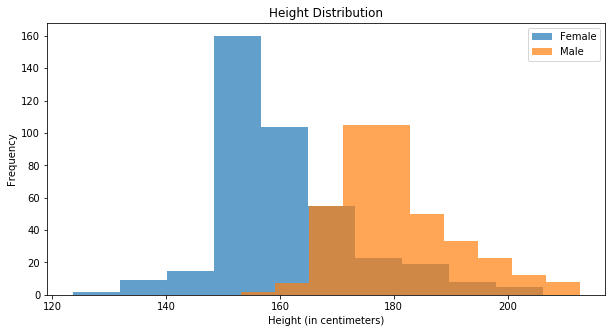

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df_height[df_height['Gender'] == 1]['Height'].plot(
    label='Female', kind='hist', 
    bins=10, alpha=0.7, ax=ax
)
df_height[df_height['Gender'] == 2]['Height'].plot(
    label='Male', kind='hist', 
    bins=10, alpha=0.7, ax=ax
)

# ax.set_xlim(140, 200)
ax.legend()
ax.set_title('Height Distribution')
ax.set_xlabel('Height (in centimeters)')

fig.show()

In [163]:
# df_height['Gender (text)'] = df_height['Gender'].apply(lambda g: {1: 'F', 2: 'M'}.get(g, 'N/A'))

df_height.groupby('Gender')[['Height']].agg([np.mean, np.median]).round(1)

Height       
         mean median
Gender              
1       160.5  157.3
2       180.5  178.4

In [157]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_height, test_size=0.3, random_state=22)

x_train = df_train[['Gender']]
x_test  = df_test[['Gender']]

y_train = df_train['Height']
y_test  = df_test['Height']

from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()

clf.fit(x_train, y_train)



DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [178]:
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error


for criterion in ['mse', 'mae']:
    rgrsr = DecisionTreeRegressor(criterion=criterion)
    rgrsr.fit(x_train, y_train)

    print(f'\ncriterion={criterion}:\n')
    print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))
    
    y_test_pred = rgrsr.predict(x_test)
    
    print('MSE:', round(mean_squared_error(y_test, y_test_pred), 1))
    print('MAE:', round(mean_absolute_error(y_test, y_test_pred), 1))


criterion=mse:

|--- Gender <= 1.5
|   |--- value: [160.2]
|--- Gender >  1.5
|   |--- value: [180.8]

MSE: 117.2
MAE: 8.2

criterion=mae:

|--- Gender <= 1.5
|   |--- value: [157.5]
|--- Gender >  1.5
|   |--- value: [178.6]

MSE: 123.3
MAE: 7.8


In [138]:
from sklearn.datasets import fetch_openml

In [12]:
# https://www.openml.org/d/40601
ram = fetch_openml(name='RAM_price')

In [13]:
df = pd.DataFrame(
    ram.data,
    columns=ram['feature_names']
)

df['target'] = ram['target']

In [14]:
df.sample(10)

,date,target
113,1992.33,30.0000
89,1990.33,98.3000
283,2009.75,0.0183
228,2002.25,0.1930
50,1986.67,190.0000
78,1989.17,505.0000
305,2012.67,0.0040
44,1986.17,300.0000
105,1991.67,46.3000
53,1987.00,176.0000


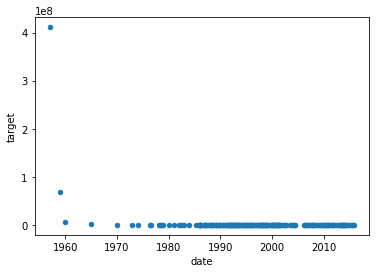

In [16]:
df.sample(n=200).plot(
    kind='scatter',
    x='date',
    y='target'
)